# DRAWING BOUNDING BOXES USING Q-LEARNING AND SARSA ALGORITHMS

<font color='cyan'>Responsible TA for this challenge: AmirHossein Razlighi </font>

<font color='green'>Ask your questions via (@amirhossein_razlighi) or on the quera thread!</font>

  In this notebook, we will be using Q-Learning and SARSA algorithms to draw bounding boxes around the objects in the image. You will use a novel Reinforcement Learning method to learn how to draw bounding boxes! This notebook is based inspired by a new paper in computer vision. So, you are going to go through some basic research challenges. In this excercise, early accept is not important. Your models will compete against each other based on the metrics mentioned in the end of the notebook. The more accurate your model is, the chance of you winning this competition is higher.

  Good Luck!

In [ ]:
# If you are running locally, use this piece of code to make a virtual environment
# and install the required packages

!python3 -m venv ./venv
!source ./venv/bin/activate

In [ ]:
%pip install wget
%pip install xml-python
%pip install Pillow torch numpy matplotlib

  # Download the dataset and define the Dataset class:
  In this section, we will download the PASCAL-VOC dataset. This dataset contains images of different objects. We will use this dataset to train our model. The dataset is available at: http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
  After that, we will define a Dataset and split the images to train and test sets. We will use the train set to train our model and the test set to evaluate our model. We will use the cat images in this excercise!

In [2]:
import os
import wget

# Download the dataset
url = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
filename = 'VOCtrainval_06-Nov-2007.tar'
if not os.path.exists(filename):
    print('Downloading dataset...')
    wget.download(url, filename)
    print('\nDataset downloaded.')
else:
    print('Dataset already downloaded.')


Dataset already downloaded.


In [55]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

--2023-03-08 16:20:46--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  1.78MB/s    in 4m 27s  

2023-03-08 16:25:14 (1.64 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [56]:
!tar -xf VOCtrainval_06-Nov-2007.tar

In [4]:
import os
import xml.etree.ElementTree as ET

# Extract the bounding box coordinates and class labels for "cat" objects
def extract_bboxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.iter('object'):
        difficult = int(obj.find('difficult').text)
        if difficult == 1:
            continue
        if obj.find('name').text.lower().strip() != 'cat':
            continue
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text) - 1
        ymin = int(bbox.find('ymin').text) - 1
        xmax = int(bbox.find('xmax').text) - 1
        ymax = int(bbox.find('ymax').text) - 1
        bboxes.append((xmin, ymin, xmax, ymax))
    return bboxes

# Extract the bounding boxes for all "cat" objects in the dataset
dataset_path = 'VOCdevkit/VOC2007'
images_dir = os.path.join(dataset_path, 'JPEGImages')
annotations_dir = os.path.join(dataset_path, 'Annotations')
cat_bboxes = {}
for filename in os.listdir(annotations_dir):
    if not filename.endswith('.xml'):
        continue
    basename = os.path.splitext(filename)[0]
    xml_file = os.path.join(annotations_dir, filename)
    image_file = os.path.join(images_dir, basename + '.jpg')
    if not os.path.exists(image_file):
        continue
    bboxes = extract_bboxes(xml_file)
    if len(bboxes) == 0:
        continue
    cat_bboxes[basename] = bboxes


print('Number of cat images:', len(cat_bboxes))


Number of cat images: 337


In [5]:
from PIL import Image

# Resize the images and bounding boxes to a fixed size
image_size = (224, 224)
resized_bboxes = {}
for basename, bboxes in cat_bboxes.items():
    image_file = os.path.join(images_dir, basename + '.jpg')
    image = Image.open(image_file).resize(image_size)
    image.save(os.path.join(images_dir, basename + '_resized.jpg'))
    resized_bboxes[basename] = [(xmin * image_size[0] // image.width,
                                 ymin * image_size[1] // image.height,
                                 xmax * image_size[0] // image.width,
                                 ymax * image_size[1] // image.height)
                                for xmin, ymin, xmax, ymax in bboxes]


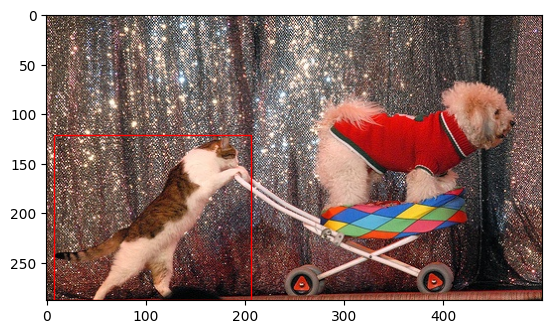

In [6]:
import numpy as np
from torch.utils.data import Dataset, random_split


class Cat_Images(Dataset):
    def __init__(self, root_dir, bboxes, transform=None):
        ...

    def __len__(self):
        ...

    def __getitem__(self, index):
        ...


# Create a dataset, split it into train and test sets.
# TODO

cat_dataset = ...
train_set, test_set = ...

# Get a random image from dataset and show with its bounding boxes
# TODO

In [7]:
# select a random image and print out its dimensions
# TODO

500 375


# Defining the Environment:

In [8]:
# Define the environment.
# The Environment is supposed to define and describe the state space, action space, and the reward function.
# The environment can also have a function to reset the environment and a function to step through the environment.
# The reset function can return the initial state of the environment.
# The step function can take an action as input and return the next state, reward, and a boolean indicating whether the episode is over.
# The environment can also have a render function to visualize the environment.
# Feel free to describe it based on your ideas and creativity!
# TODO


class Environment:
    ...

Explain How you defined the environment. You should note that there is not only 1 image but $t$ images (in training set) and $n-t$ images (in test set). So, your definition should match these conditions! Explain your State Space, The Action Space of your agent and the Reward Function. Explain how your agent learns meaningful features for the <strong>"drawing bounding box"</strong>. Think _outside the box_! the better you choose your state space, the easier you get in the rest of the code!
  
# Answer:
...

# Define the Agent:

In [14]:
import random

env = ...

# Define the function below to calculate the intersection over union (IOU) between two bounding boxes.
# IoU is simply a measurement of the overlap between two bounding boxes.
# It is calculated by dividing the area of overlap by the area of union. Obviously, If IoU is 1 it means two bounding boxes are the same.
# and if the bounding boxes don't overlap at all (are disjoint), IoU is 0.
# We will use this to understand how well our predicted bounding box is compared to the ground truth bounding box.
# TODO

def iou(bbox1, bbox2):
    # TODO


# define the agent. Your agent should have the ability to learn speific features across the environment and learn how to draw bounding boxes
# around images! It should take actions in the environment and learn from the rewards it gets. Here, we use 2 different algorithms
# that you are familiar with: Q-Learning and Sarsa. Train the agent on both of them and compare the results.
# then choosed the best model and go to the next cells for testing your agent.
# TODO

class Agent:
    ...

    # Use Q-Learning or Sarsa to train the agent on the environment
    # TODO: Note that your function should have a parameter to select between Q-Learning and Sarsa
    def training(self, episdes, batch_size, algorithm="Q-Learning"):
        ...

    def testing(self):
        ...

    ...

# The training process:

In [ ]:
# TODO: Train the agent on training_set. Use both "Q-Learning" and "Sarsa" algorithms and compare the results. Choose the better model
# for inference and testing (later on).
# It's better for you to save the model after training and load it for testing.
# Also it is recommended to use batch_size and set it to your desired value to speed up the training process.

q_agent = ...
sarsa_agent = ...

print("starting training")
...
print("finished training")

best_agent = ...

# Test your model:

Mean IoU: 57.04


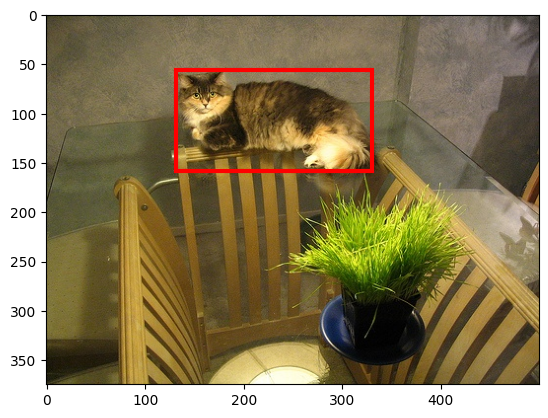

In [21]:
# Test the agent on test_set and report the mean IOU
# TODO

mean_iou = ...

print("Mean IoU: {}".format(mean_iou))

# show a random image from test_set and the ground truth bounding box and the predicted bounding box (in different colors)
# TODO

Your Code will be checked for the correct implementation and usage of "Q-Learning and Sarsa" algorithms. After all, your final MIoU will be compared to other students' MIoU. If you have any questions, don't hesitate to ask!